In [1]:
#q1
import os
sorted(os.listdir("data"), reverse = True)

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [2]:
def f():
    print("A")
    yield 1
    print("B")
    yield 2
    print("C")
    yield 3
for x in f():
    print(x)

A
1
B
2
C
3


In [3]:
#q2
sorted([os.path.join("data", i) for i in os.listdir("data")], reverse = True)

['data\\sample_reviews.json',
 'data\\sample_reviews.csv',
 'data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv',
 'data\\products.json']

In [4]:
#q3
sorted([os.path.join("data", i) for i in os.listdir("data") if i[-5:] == ".json"], reverse = True)

['data\\sample_reviews.json',
 'data\\review5.json',
 'data\\review4.json',
 'data\\review3.json',
 'data\\review2.json',
 'data\\review1.json',
 'data\\products.json']

In [5]:
#q4
sorted([os.path.join("data", i) for i in os.listdir("data") if i[:6] == "review"], reverse = True)

['data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv']

In [6]:
#q5
import json

def openJSON(path):
    with open(path) as f:
        data = json.load(f)
    return data    
    
products = openJSON('data/products.json')
products

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [7]:
#q6
import csv 
import pandas as pd

# copied from https://automatetheboringstuff.com/chapter14/
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

# Convert CSV to a list of dicts
def load_csv_to_dicts(path):
    rows = process_csv(path)
    header = rows[0]
    rows = rows[1:]
    
    dict_list = []
    for row in rows:
        new_row = {}
        for i in range(len(header)):
            new_row[header[i]] = row[i]
        dict_list.append(new_row)
    return dict_list
    
def load_csv_to_dicts_1(path):
    with open(path) as f:
        a = [{k: v for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    return a

data = load_csv_to_dicts_1("data/review1.csv")
i = 0
q6 = ""
while i < len(data):
    if data[i]['review id'] == "84440":
        q6 = data[i]['review text']
        break;
    i += 1
        
q6    

'I would recommend this product. It works great and ver compact.'

In [8]:
#q7
q7 = ""
path = sorted([os.path.join("data", i) for i in os.listdir("data") if i[-4:] == ".csv" and i[:6] == "review"], reverse = True)
for p in path:
    data = load_csv_to_dicts_1(p)
    i = 0
    while i < len(data):
        if data[i]['review id'] == "28615":
            q7 = data[i]['review text']
            break;
        i += 1
        
q7       

'Loveeeeeeeee........................................'

In [9]:
#q8
q8 = ""
path = sorted([i for i in os.listdir("data") if i[-4:] == ".csv" and i[:6] == "review"], reverse = True)
for p in path:
    data = load_csv_to_dicts_1(os.path.join("data", p))
    i = 0
    while i < len(data):
        if data[i]['review id'] == "69273":
            q8 = p
            break;
        i += 1
        
q8

'review2.csv'

In [10]:
#q9
from collections import namedtuple
# from datetime import datetime
# from recordclass import recordclass
Review = namedtuple("Review", ["id", "username", "asin", "title", "text", "rating", "do_recommend", "num_helpful", "date"])

def get_reviews(csv_path, json_path):
    csvData = load_csv_to_dicts_1(csv_path)
    jsonData = openJSON(json_path)
    ids = list(jsonData)
    
    a = []
    for i in range(len(csvData)):
        row = csvData[i]
        recom = False
        review_id = row['review id']
        if row['review id'] == "":
#             print(row)
#             review_id = ids[i]
            continue
        
        if row['review title'] == "" or row['review text'] == "":
            continue
            
        if row['review rating'] == None:
            continue    
            
        if row['review do_recommend'].lower() == "true":
            recom = True
        elif row['review do_recommend'].lower() == "false":    
            recom = False
        else:
            continue
        
        if row['review date'] == None:
#         datetime.strptime(row['review date'],"%Y-%m-%d")
            continue
            
        d = Review(int(review_id), jsonData[review_id][0], jsonData[review_id][1], row['review title'], row['review text'], int(row['review rating']), recom, int(row['review num_helpful']), row['review date'])
        a.append(d)
    return a

openJSON("data/sample_reviews.json")

{'46663': ['Dmh1589', 'B018Y229OU'],
 '36363': ['Shoot2thril', 'B018Y229OU'],
 '15763': ['Barbara', 'B018Y229OU'],
 '5463': ['Elec8', 'B018Y229OU'],
 '54066': ['Silvrblur', 'B018Y229OU'],
 '33466': ['Trish', 'B018Y229OU'],
 '40869': ['airbear', 'B018Y229OU'],
 '30569': ['lorphe', 'B018Y229OU'],
 '89472': ['felix', 'B018Y229OU'],
 '48272': ['Bull99', 'B018Y229OU']}

In [11]:
#q10
get_reviews("data/sample_reviews.csv", "data/sample_reviews.json")

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [12]:
#q11
get_reviews("data/review4.csv", "data/review4.json")[:10]

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [13]:
#q12
get_reviews("data/review2.csv", "data/review2.json")[-10:]

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [14]:
#q13
reviews = []
jsonList = sorted([os.path.join("data", i) for i in os.listdir("data") if i[-5:] == ".json" and i[:6] == "review"], reverse = True)
csvList = sorted([os.path.join("data", i) for i in os.listdir("data") if i[-4:] == ".csv" and i[:6] == "review"], reverse = True)
for i in range(len(jsonList)): 
    try:
        reviews += get_reviews(csvList[i],jsonList[i])
    except Exception as e:    
        print(str(e))

q13 = None    
for i in reviews:
    if i.id == 25401:
        q13 = i
        break

q13        

Expecting ',' delimiter: line 2011 column 5 (char 25054)


Review(id=25401, username='Brody16', asin='B018Y229OU', title='Wonderful for our grandsons', text='Love the ease of using them for our grandsons and they enjoyed them for Christmas', rating=1, do_recommend=True, num_helpful=0, date='2017-01-06')

In [15]:
#q14
q14 = None    
for i in reviews:
    if i.id == 78626:
        q14 = i
        break

q14   

Review(id=78626, username='Mijenx', asin='B01AHB9CN2', title='Ended up returning', text='I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.', rating=1, do_recommend=False, num_helpful=2, date='2016-11-25')

In [16]:
#q15
from operator import attrgetter
sorted(reviews, key=attrgetter("username"), reverse = True)[:10]

[Review(id=29325, username='zerofighterblue', asin='B018Y229OU', title='cant live without', text='have a kindle with a broken screen. bought originally for 99.00. now regular price is 49.99 and were on sale black Friday for 34.99. got 2 more.', rating=5, do_recommend=True, num_helpful=1, date='2015-12-10'),
 Review(id=96947, username='zedog83', asin='B01AHB9CN2', title='Great for kids', text='Bought this for our 6 year old daughter and she uses it daily. She enjoys watching movies on it and playing learning games. So far it has been very durable and battery life has been great.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-18'),
 Review(id=77499, username='zcraig7', asin='B018Y229OU', title='Awesome picture quality', text='I bought two of these for black friday and the kids love them', rating=5, do_recommend=True, num_helpful=0, date='2016-01-04'),
 Review(id=48890, username='zarm7', asin='B018Y229OU', title='This is a nice tablet', text='I bought it for reading books. An

In [17]:
#OPTIONAL q1
ans = None    
for i in reviews:
    if i.id == 69273:
        ans = i.title
        break

ans 

'Excellent'

In [18]:
#OPTIONAL q5
sorted(reviews, key=attrgetter("date"))[0]

Review(id=49038, username='TechWizFL', asin='B00IOY8XWQ', title='Best Kindle Ever', text='This is so far the best Kindle I have ever owned. I love the screen and the resolution on it. The device out performs all of the other e readers on the market.', rating=5, do_recommend=True, num_helpful=2, date='2014-11-04')

In [19]:
#q16
def bucketize(lookup_list, lookup_key):
    buck = {}
    for row in lookup_list:
        keys = getattr(row,lookup_key)
        if keys in buck:
            buck[keys].append(row)
        else:
            buck[keys] = [row]
    return buck  

users = bucketize(reviews, "username")
q16 = {}
for k, v in users.items():
    q16[k] = len(v)
    
import operator
from collections import OrderedDict
dict(sorted(q16.items(), key=operator.itemgetter(1), reverse = True)[:22])
# q16_s = OrderedDict(sorted(q16.items(), key=operator.itemgetter(1), reverse = True)[:22])
# dict(q16_s)

{'Missy': 4,
 '1234': 4,
 'Mike': 4,
 'Susan': 4,
 'Dave': 4,
 'Manny': 3,
 'Michael': 3,
 'Susie': 3,
 'Bill': 3,
 'James': 3,
 'Lisa': 3,
 'Kathy': 3,
 'paul': 3,
 'steve': 3,
 'John': 3,
 'Angie': 3,
 'Richard': 3,
 'Steve': 3,
 'Bubba': 3,
 'Chris': 3,
 'Grandma': 3,
 'Frank': 3}

In [20]:
#q17
q17 = {}
for k, v in users.items():
    cnt = 0
    for a in v:
        cnt += a.num_helpful
    if cnt >= 5:
        q17[k] = cnt
    
q17

{'Raza': 5,
 'Rodge': 6,
 'Ellen': 10,
 'Karch': 5,
 'FrankW': 5,
 'Kime': 5,
 'Mark': 5,
 '1Briansapp': 5,
 'trouble': 5,
 'Stuartc': 8,
 'Earthdog': 27}

{3: 104.72777777777777,
 4: 96.37427385892116,
 5: 95.34106090373281,
 1: 128.75,
 2: 110.24}

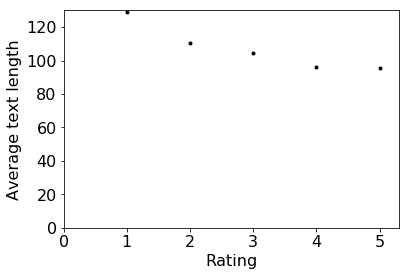

In [21]:
#q18
ratings = bucketize(reviews, "rating")
q18 = {}
for k, v in ratings.items():
    cnt = 0
    for a in v:
        cnt += len(a.text)
    q18[k] = cnt/len(v)    

import pandas, matplotlib.pylab as plt
    
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    
def scatter_1(d, xlabel="Please Label Me!!", ylabel="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot(style=".", color="black", fontsize=16, rot = 0)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    return ax
    
def scatter_2(d, xlabel="Please Label Me!!", ylabel="Please Label Me!!!"):
    ds = sorted(d.items())
    x,y = zip(*ds)
    plt.scatter(x, y, color="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def scatter_3(d, xlabel="Please Label Me!!", ylabel="Please Label Me!!!"):
    df = pandas.DataFrame(d.items(), columns = [xlabel, label])
    ax = df.plot(kind = "scatter", x=xlabel, y=ylabel,  color="black", fontsize=16, rot = 0)
    return ax 
    
ax = scatter_1(q18, "Rating", "Average text length")   
ax.set_xlim(0,5.3)
ax.set_ylim(0,130)
q18

{3: 0.03888888888888889,
 4: 0.06639004149377593,
 5: 0.06836935166994106,
 1: 0.35,
 2: 0.12}

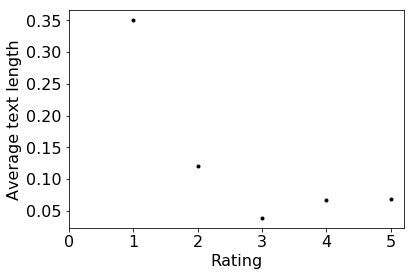

In [22]:
#q19
q19 = {}
for k, v in ratings.items():
    cnt = 0
    for a in v:
        cnt += 1 if a.num_helpful > 0 else 0
    q19[k] = cnt/len(v) 
    
ax = scatter_1(q19, "Rating", "Average text length") 
ax.set_xlim(0,5.2)
q19    

In [23]:
#q20
asins = bucketize(reviews, "asin")
q20 = {}
for k, v in asins.items():
    cnt = 0
    for a in v:
        cnt += a.rating
    q20[products[k]] = cnt/len(v) 
    
q20

{'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta': 4.506039150354019,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta': 4.6,
 'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers': 4.866666666666666,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,
 'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers': 3.8333333333333335,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5.0,
 'Kindle Voyage E-reader, 6

{2401: 4.506039150354019,
 975: 4.6,
 15: 4.866666666666666,
 47: 4.574468085106383,
 6: 3.8333333333333335,
 61: 4.590163934426229,
 11: 4.7272727272727275,
 165: 4.6909090909090905,
 1: 5.0,
 126: 4.666666666666667,
 174: 4.603448275862069,
 12: 4.583333333333333}

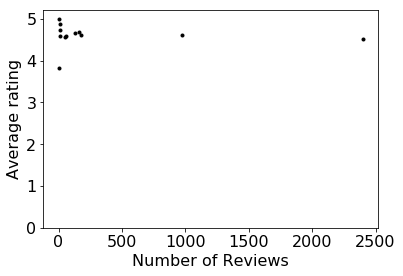

In [24]:
#q21
q21 = {}
for k, v in asins.items():
    cnt = 0
    for a in v:
        cnt += a.rating
    q21[len(v)] = cnt/len(v) 
    
ax = scatter_1(q21, "Number of Reviews", "Average rating")
ax.set_ylim(0,5.2)

q21

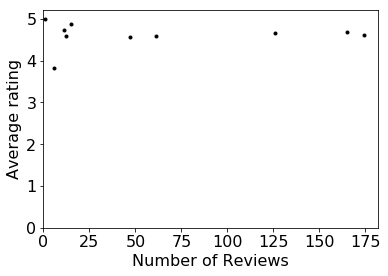

In [25]:
#q22
ax.set_xlim(0,182)
ax.figure

{'03': 19,
 '01': 50,
 '04': 10,
 '11': 9,
 '02': 13,
 '05': 15,
 '12': 29,
 '06': 8,
 '09': 13,
 '10': 7,
 '07': 1}

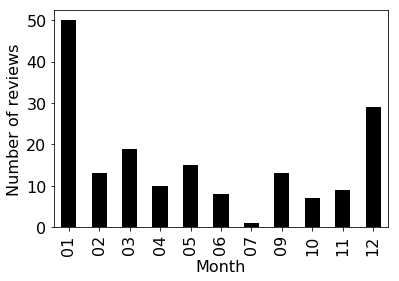

In [26]:
#q23
def bucketize_1(lookup_list):
    buck = {}
    for row in lookup_list:
        keys = row.date[5:7]
        if keys in buck:
            buck[keys].append(row)
        else:
            buck[keys] = [row]
    return buck  

def plot_dict(d, xlabel="Please Label Me!!!", ylabel="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    
def product_month(product_name):
    ans = {}
    for k, v in asins.items():
        if products[k] == product_name:
            buck = {}
            lookup_list = v
            for row in lookup_list:
                keys = row.date[5:7]
                if keys in buck:
                    buck[keys] += 1
                else:
                    buck[keys] = 1
            ans = buck
    return ans

q23 = product_month('Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case')
plot_dict(q23, "Month", "Number of reviews")        
q23

{'01': 960,
 '07': 102,
 '06': 135,
 '03': 243,
 '02': 157,
 '12': 509,
 '04': 46,
 '10': 21,
 '09': 99,
 '08': 110,
 '05': 8,
 '11': 11}

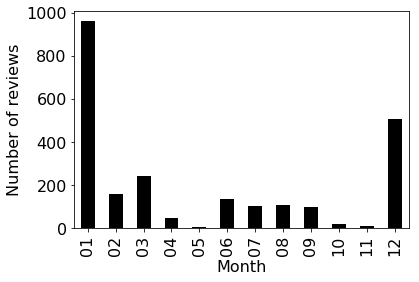

In [27]:
#q24
q24 = product_month('Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')
plot_dict(q24, "Month", "Number of reviews")        
q24

In [28]:
#q25
#os walk
paths = []
for root, dirs, files in os.walk("broken_file", topdown=False):
    for name in files:
        paths.append(os.path.join(root, name))
        
sorted(paths, reverse = True)

# recursive function
def get_file_paths(parent):
    names = sorted(os.listdir(parent), reverse = True)
    paths = []
    for name in names:
        path = os.path.join(parent, name)
        if os.path.isdir(path):
            paths += get_file_paths(path)
        elif name[0] != ".":
            paths.append(path)
    return paths

get_file_paths(os.path.join('broken_file', 'rating4', 'very_helpful'))

['broken_file\\rating4\\very_helpful\\very_helpful.json']

In [29]:
#q26
get_file_paths(os.path.join('broken_file', 'rating5'))

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json']

In [30]:
#q27
paths = get_file_paths('broken_file')
paths

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json',
 'broken_file\\rating4\\very_helpful\\very_helpful.json',
 'broken_file\\rating4\\others\\short\\short.json',
 'broken_file\\rating4\\others\\others\\others.json',
 'broken_file\\rating4\\not_helpful.json',
 'broken_file\\rating3\\others\\others.json',
 'broken_file\\rating3\\long\\long.json',
 'broken_file\\others.json']

In [31]:
#q28
broken_reviews = {}
for path in paths:
    data = openJSON(path)
    broken_reviews.update(data)

broken_asins = []
for k,v in broken_reviews.items():
    keys = v[1]
    if keys not in broken_asins:
        broken_asins.append(keys)
        
len(broken_asins)

1

In [32]:
#q29
# JSON string
json_str = json.dumps(broken_reviews)

# save to file
f = open("broken_data.json", "w", encoding="utf-8")
f.write(json_str)
f.close()

reviews += get_reviews(os.path.join("data",'review3.csv'), 'broken_data.json')
os.remove('broken_data.json')
len(reviews)

4995

In [33]:
#q30
asins = bucketize(reviews, "asin")
q30 = 0
for k, v in asins.items():
    cnt = 0
    if products[k] == "Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta":
        for a in v:
            cnt += a.rating
        q30 = cnt/len(v) 

prev = q20['Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta']        
(q30 - prev)/prev*100

-0.039407079451942564